In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/raw_data"

In [3]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1
3,파란색 크롭 셔츠,봄가을,2023,상의,1,1,0,스카이블루,4,1,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격,1
4,숏 트렌치 코트,봄가을,2023,겉옷,0,1,1,베이지,16,1,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격,1


In [4]:
df.shape

(150, 20)

In [5]:
df['성공점수'].mean()

3.2177777777599985

In [6]:
df['성공점수'].median()

3.333333333

In [7]:
df['색상그룹'].mode()

0    블루 계열
Name: 색상그룹, dtype: object

<AxesSubplot:>

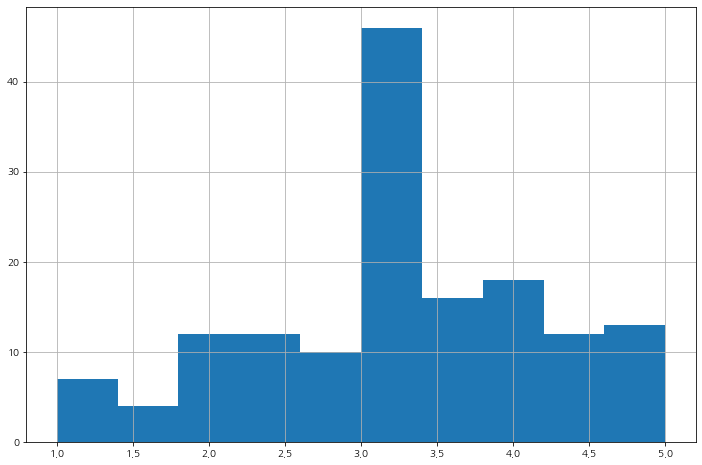

In [8]:
df['성공점수'].hist(bins=10, figsize=(12,8))

In [9]:
# pip install pingouin
import pingouin as pg

/Users/younghyunkim/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/younghyunkim/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [10]:
# 신뢰 구간 구하기

pg.ttest(df["성공점수"], 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,41.591792,149,two-sided,6.749313e-84,"[3.06, 3.37]",3.395956,1.379e+80,1.0


In [16]:
import scipy #numpy랑 같이 불러오기
scipy.stats.bootstrap([df['성공점수']], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0599999999799996, high=3.359999999993333), standard_error=0.07717684493426742)

In [17]:
scipy.stats.bootstrap([df['성공점수']], np.median, confidence_level=0.99)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0, high=3.333333333), standard_error=0.13304524473840948)

In [18]:
#귀무가설: 설마 900만원은 아니곘지? p 발류를 a와 비교 
#유의수준(5% = 0.05)
#0.021852 < 0.05 귀무 가설 기각 (통계적으로 유의함-> 기각 -  귀무가설이 틀렸다 ) (상식 파괴)
pg.ttest(df['성공점수'], 3.5, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.647899,149,two-sided,0.000365,"[3.06, 3.37]",0.29785,47.594,0.951976


<AxesSubplot:xlabel='가격', ylabel='성공점수'>

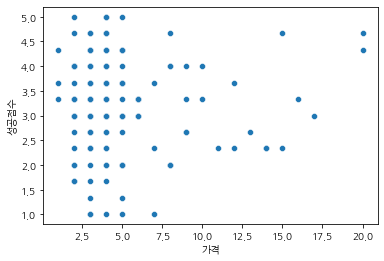

In [24]:
sns.scatterplot(x='가격', y='성공점수', data=df)

In [25]:
pg.corr(df['가격'], df['성공점수']) #표본상관계수 r값

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.002021,"[-0.16, 0.16]",0.980416,0.102,0.049963


In [26]:
from statsmodels.formula.api import ols

In [35]:
# p < a - 통계적으로 유의한 차이가 있다("두 집단의 평균이 다르다") (a=0.05)

In [11]:
#카테고리별로 확인해보기
df_b = df[df['카테고리'] == '하의']
df_t = df[df['카테고리'] == '상의']
df_o = df[df['카테고리'] == '겉옷']
df_one = df[df['카테고리'] == '원피스']

In [16]:
# 하의는 입어보고 구매한 경우와 그렇지 않은 경우 두 집단은 같다 -> p값이 0.05보다 크므로 두 집단은 유사하다.
try_yes = df_b['성공점수'][df_b["구매 전 착용 여부"] == 1]
try_no = df_b['성공점수'][df_b["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.986901,24.380236,two-sided,0.333385,"[-0.44, 1.24]",0.374504,0.511,0.15685


In [15]:
# 겉옷은 입어보고 구매한 경우와 그렇지 않은 경우 두 집단의 성공점수 평균은 같다
try_yes = df_o['성공점수'][df_o["구매 전 착용 여부"] == 1]
try_no = df_o['성공점수'][df_o["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.445386,4.39668,two-sided,0.06511,"[-0.11, 2.35]",1.278543,2.794,0.61222


In [18]:
# 상의는 유행하는 디자인의 경우와 그렇지 않은 경우에도 두 집단의 성공점수 평균은 같다
trend_yes = df_t['성공점수'][df_t["유행 여부"] == 1]
trend_no = df_t['성공점수'][df_t["유행 여부"] == 0]
pg.ttest(trend_yes, trend_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.82953,17.825148,two-sided,0.084098,"[-1.12, 0.08]",0.617403,1.107,0.57093


In [19]:
# 원피스는 유행하는 디자인의 경우와 그렇지 않은 경우에도 두 집단의 성공점수 평균은 같다
trend_yes = df_one['성공점수'][df_one["유행 여부"] == 1]
trend_no = df_one['성공점수'][df_one["유행 여부"] == 0]
pg.ttest(trend_yes, trend_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.551741,1.631003,two-sided,0.152755,"[-4.49, 1.6]",1.598676,2.557,0.486092


In [20]:
# 겉옷은 브랜드가 있는 경우와 그렇지 않은 경우에도 두집단의 성공점수 평균은 같다
brand_yes = df_o['성공점수'][df_o["브랜드 여부"] == 1]
brand_no = df_o['성공점수'][df_o["브랜드 여부"] == 0]
pg.ttest(brand_yes, brand_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.063235,10.204251,two-sided,0.312189,"[-1.18, 0.42]",0.397457,0.621,0.118737


In [22]:
# 원피스는 브랜드가 있는 경우와 그렇지 않은 경우에도 두집단의 성공점수 평균은 같다
brand_yes = df_one['성공점수'][df_one["브랜드 여부"] == 1]
brand_no = df_one['성공점수'][df_one["브랜드 여부"] == 0]
pg.ttest(brand_yes, brand_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.156603,12,two-sided,0.269941,"[-0.55, 1.79]",0.61823,0.685,0.186843


In [23]:
# 구매처에 따른 두 집단의  성공점수 평균은 같다 
online = df['성공점수'][df["구매처"] == 1]
offline = df['성공점수'][df["구매처"] == 0]
pg.ttest(online, offline, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380194,52.782408,two-sided,0.705327,"[-0.46, 0.31]",0.076696,0.218,0.068032


In [28]:
# 구매처에 따른 두 집단의  성공점수 평균은 같다 
online = df['성공점수'][df["구매처"] == 1]
offline = df['성공점수'][df["구매처"] == 0]
pg.ttest(online, offline, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380194,52.782408,two-sided,0.705327,"[-0.46, 0.31]",0.076696,0.218,0.068032
